In [44]:
url = 'https://www.gutenberg.org/files/1524/1524-0.txt'

# Fetch the text
response = requests.get(url)
text = response.text

In [45]:
text

"\ufeffThe Project Gutenberg eBook of Hamlet, by William Shakespeare\r\n\r\nThis eBook is for the use of anyone anywhere in the United States and\r\nmost other parts of the world at no cost and with almost no restrictions\r\nwhatsoever. You may copy it, give it away or re-use it under the terms\r\nof the Project Gutenberg License included with this eBook or online at\r\nwww.gutenberg.org. If you are not located in the United States, you\r\nwill have to check the laws of the country where you are located before\r\nusing this eBook.\r\n\r\nTitle: Hamlet\r\n\r\nAuthor: William Shakespeare\r\n\r\nRelease Date: November 1998 [eBook #1524]\r\n[Most recently updated: November 9, 2023]\r\n\r\nLanguage: English\r\n\r\nProduced by: Dianne Bean\r\n\r\n*** START OF THE PROJECT GUTENBERG EBOOK HAMLET ***\r\n\r\n\r\n\r\n\r\ncover\r\n\r\n\r\n\r\n\r\nTHE TRAGEDY OF HAMLET, PRINCE OF DENMARK\r\n\r\nby William Shakespeare\r\n\r\n\r\n\r\n\r\nContents\r\n\r\n ACT I\r\n Scene I. Elsinore. A platform before

In [ ]:
import requests

# URL of Hamlet text from Project Gutenberg
url = 'https://www.gutenberg.org/files/1524/1524-0.txt'

# Fetch the text
response = requests.get(url)
text = response.text

# Optionally save the text to a file
with open('hamlet.txt', 'w', encoding='utf-8') as f:
    f.write(text)


In [2]:
def preprocess_text(text):
    # Remove Project Gutenberg header and footer
    start_marker = "*** START OF THE PROJECT GUTENBERG EBOOK HAMLET ***"
    end_marker = "*** END OF THE PROJECT GUTENBERG EBOOK HAMLET ***"
    start = text.find(start_marker) + len(start_marker)
    end = text.find(end_marker)
    text = text[start:end]
    return text.strip()

clean_text = preprocess_text(text)


In [3]:
clean_text


'cover\r\n\r\n\r\n\r\n\r\nTHE TRAGEDY OF HAMLET, PRINCE OF DENMARK\r\n\r\nby William Shakespeare\r\n\r\n\r\n\r\n\r\nContents\r\n\r\n ACT I\r\n Scene I. Elsinore. A platform before the Castle\r\n Scene II. Elsinore. A room of state in the Castle\r\n Scene III. A room in Polonius’s house\r\n Scene IV. The platform\r\n Scene V. A more remote part of the Castle\r\n\r\n ACT II\r\n Scene I. A room in Polonius’s house\r\n Scene II. A room in the Castle\r\n\r\n ACT III\r\n Scene I. A room in the Castle\r\n Scene II. A hall in the Castle\r\n Scene III. A room in the Castle\r\n Scene IV. Another room in the Castle\r\n\r\n ACT IV\r\n Scene I. A room in the Castle\r\n Scene II. Another room in the Castle\r\n Scene III. Another room in the Castle\r\n Scene IV. A plain in Denmark\r\n Scene V. Elsinore. A room in the Castle\r\n Scene VI. Another room in the Castle\r\n Scene VII. Another room in the Castle\r\n\r\n ACT V\r\n Scene I. A churchyard\r\n Scene II. A hall in the Castle\r\n\r\n\r\n\r\n\r\nDr

In [8]:
import spacy
from spacy import displacy
import pandas as pd

# Load spaCy English model
nlp = spacy.load('en_core_web_sm')

# Process the text
doc = nlp(clean_text)


In [9]:
from collections import Counter

# Extract tokens that are not punctuation or whitespace
words = [token.text.lower() for token in doc if not token.is_punct and not token.is_space]

# Calculate word frequencies
word_freq = Counter(words)

# Convert to DataFrame
word_freq_df = pd.DataFrame(word_freq.items(), columns=['word', 'frequency']).sort_values(by='frequency', ascending=False)

print(word_freq_df.head(10))

       word  frequency
1       the       1118
93      and        983
57       to        737
3        of        678
12        i        617
16        a        562
108     you        556
146      my        516
4    hamlet        473
23       in        454


In [10]:
# Extract POS tags
pos_counts = doc.count_by(spacy.attrs.POS)

# Map POS tags to their names
pos_df = pd.DataFrame({
    'POS': [doc.vocab[pos].text for pos in pos_counts.keys()],
    'frequency': pos_counts.values()
}).sort_values(by='frequency', ascending=False)

print(pos_df)


      POS  frequency
6   PUNCT       8315
3    NOUN       6391
1   SPACE       5259
7    PRON       5113
0    VERB       3943
4     ADP       2973
5   PROPN       2701
2     DET       2313
10    ADJ       2021
13    AUX       1894
9     ADV       1581
11  CCONJ       1426
14  SCONJ        878
8    PART        836
16      X        381
15   INTJ        238
12    NUM        156
17    SYM          1


In [ ]:
from nltk.util import ngrams
from collections import Counter

# Use spaCy's tokenizer to get tokens
tokens = [token.text.lower() for token in doc if not token.is_punct and not token.is_space]

# Generate bigrams using the tokens from spaCy
bigrams = list(ngrams(tokens, 2))
bigram_freq = Counter(bigrams)
bigram_freq_df = pd.DataFrame(bigram_freq.items(), columns=['bigram', 'frequency']).sort_values(by='frequency', ascending=False)

print(bigram_freq_df.head(10))


              bigram  frequency
1799      (my, lord)        179
28         (in, the)        107
2635  (lord, hamlet)         80
276        (to, the)         67
46         (of, the)         63
1092        (i, ’ll)         57
540         (it, is)         56
325        (i, have)         54
185      (the, king)         51
219          (i, am)         46


In [30]:
# Extract named entities
entities = [(ent.text, ent.label_) for ent in doc.ents]

# Calculate entity frequencies
entity_freq = Counter(entities)
entity_freq_df = pd.DataFrame(entity_freq.items(), columns=['entity', 'frequency']).sort_values(by='frequency', ascending=False)

print(entity_freq_df.head(10))


                    entity  frequency
95   (HAMLET, WORK_OF_ART)        173
17          (HORATIO, ORG)        111
14   (Hamlet, WORK_OF_ART)         58
93          (LAERTES, ORG)         55
37          (Horatio, ORG)         36
404       (FIRST, ORDINAL)         33
123         (Ophelia, GPE)         28
79      (Polonius, PERSON)         23
35           (Nay, PERSON)         21
8           (Denmark, GPE)         21


In [31]:
def split_into_acts(text):
    acts = text.split('ACT ')
    acts = acts[1:]  # Remove any text before the first act
    act_texts = {}
    for act in acts:
        act_number = act[0]
        act_texts[f'Act {act_number}'] = act
    return act_texts

acts = split_into_acts(clean_text)

In [32]:
act_word_freqs = {}

for act_name, act_text in acts.items():
    act_doc = nlp(act_text)
    words = [token.text.lower() for token in act_doc if not token.is_punct and not token.is_space]
    word_freq = Counter(words)
    act_word_freqs[act_name] = word_freq

# Convert to DataFrame
act_word_freq_df = pd.DataFrame(act_word_freqs).fillna(0)

print(act_word_freq_df.head())


       Act I  Act V
iv       2.0    0.0
scene    7.0    2.0
i.       1.0    2.0
a       98.0  110.0
room     6.0    1.0


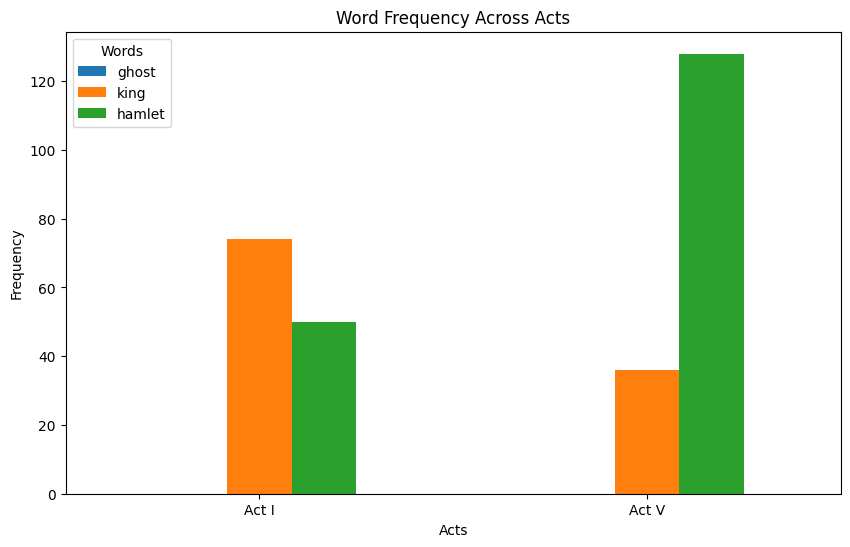

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Words to track
words_to_track = ['ghost', 'king', 'hamlet']

# Prepare data
trend_data = {}
for word in words_to_track:
    trend_data[word] = [act_word_freqs[act].get(word, 0) for act in acts.keys()]

trend_df = pd.DataFrame(trend_data, index=acts.keys())

# Plot
trend_df.plot(kind='bar', figsize=(10, 6))
plt.title('Word Frequency Across Acts')
plt.xlabel('Acts')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.legend(title='Words')
plt.show()


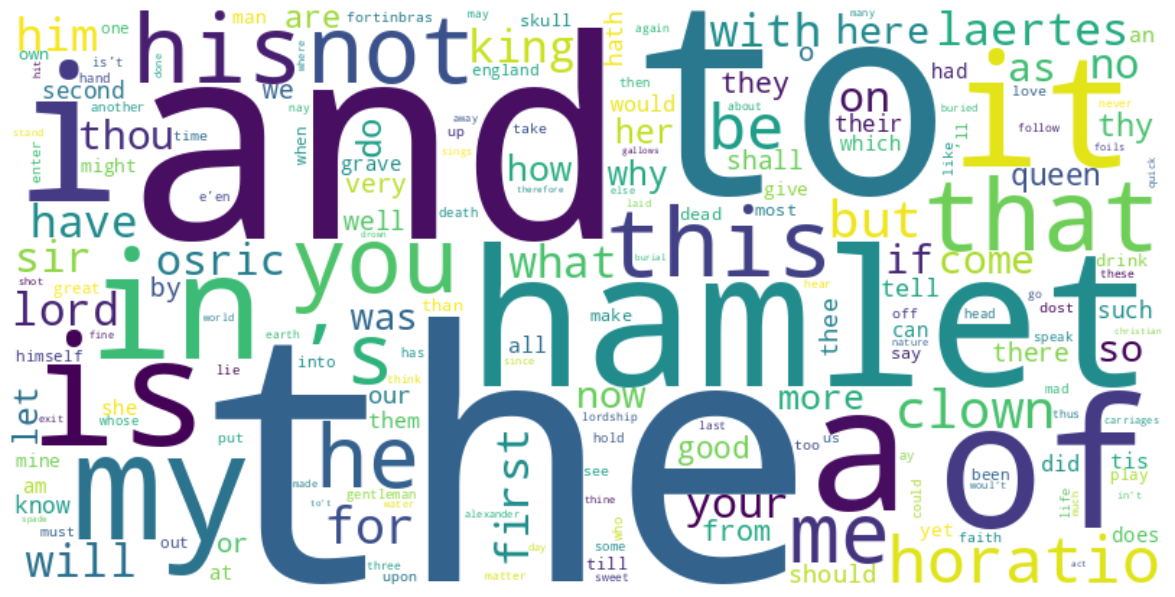

In [34]:
from wordcloud import WordCloud

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# Display the image
plt.figure(figsize=(15, 7.5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


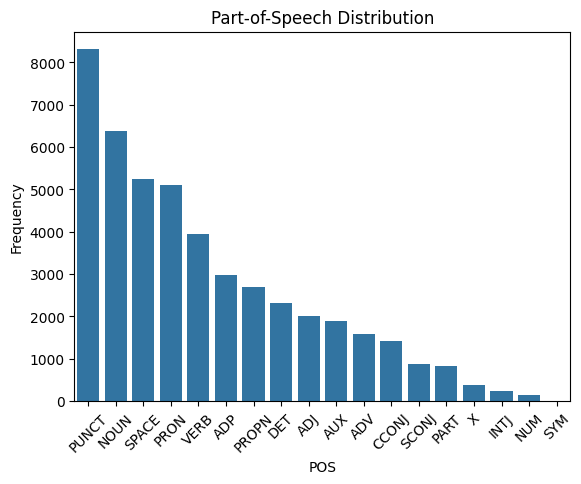

In [35]:
# Plot POS frequencies
sns.barplot(x='POS', y='frequency', data=pos_df)
plt.title('Part-of-Speech Distribution')
plt.xlabel('POS')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


In [36]:
# Select a sample sentence
for sent in doc.sents:
    sample_sent = sent.text
    break

sample_doc = nlp(sample_sent)
displacy.render(sample_doc, style='dep', jupyter=True, options={'distance': 90})


In [37]:
from textblob import TextBlob

# Install TextBlob if not already installed
# pip install textblob

# Analyze sentiment
blob = TextBlob(clean_text)
sentiment = blob.sentiment

print(f"Polarity: {sentiment.polarity}, Subjectivity: {sentiment.subjectivity}")


Polarity: 0.1529073351537655, Subjectivity: 0.527532930131622


In [ ]:
import spacy
from rich import print
from rich.text import Text
from rich.console import Console
from IPython.display import display, HTML

# Initialize spaCy model
nlp = spacy.load('en_core_web_sm')

# Define POS tag colors
pos_colors = {
    'NOUN': 'green',
    'VERB': 'red',
    'ADJ': 'blue',
    'ADV': 'cyan',
    'PRON': 'magenta',
    'DET': 'yellow',
    'ADP': 'bright_blue',
    'AUX': 'bright_red',
    'CCONJ': 'bright_magenta',
    'INTJ': 'bright_cyan',
    'NUM': 'bright_yellow',
    'PART': 'bright_green',
    'PROPN': 'bright_white',
    'PUNCT': 'white',
    'SCONJ': 'bright_blue',
    'SYM': 'bright_yellow',
    'X': 'grey',
    'SPACE': 'on black',
}


def text_to_pos_atoms_html(text):
    doc = nlp(text)
    html_output = ""
    
    for token in doc:
        pos_tag = token.pos_
        color = pos_colors.get(pos_tag, 'black')
        html_output += f'<span style="color:{color}">{pos_tag}</span> '
    
    display(HTML(html_output))

with open('hamlet.txt', 'r', encoding='utf-8') as f:
    text = f.read()
# Example usage
text_to_pos_atoms_html(text)


In [41]:
import spacy
import pandas as pd
from rich import print
from rich.text import Text
from rich.console import Console
from IPython.display import display, HTML

# Initialize spaCy model
nlp = spacy.load('en_core_web_sm')

# Define POS tag colors
pos_colors = {
    'NOUN': 'green',
    'VERB': 'red',
    'ADJ': 'blue',
    'ADV': 'cyan',
    'PRON': 'magenta',
    'DET': 'yellow',
    'ADP': 'bright_blue',
    'AUX': 'bright_red',
    'CCONJ': 'bright_magenta',
    'INTJ': 'bright_cyan',
    'NUM': 'bright_yellow',
    'PART': 'bright_green',
    'PROPN': 'bright_white',
    'PUNCT': 'white',
    'SCONJ': 'bright_blue',
    'SYM': 'bright_yellow',
    'X': 'grey',
    'SPACE': 'on black',
}

# Read the text file
with open('hamlet.txt', 'r', encoding='utf-8') as f:
    text = f.read()

# Process text using spaCy
doc = nlp(text)

# Step 2: Create a DataFrame to store token, POS tag, and color
data = {
    'token': [token.text for token in doc],
    'pos_tag': [token.pos_ for token in doc],
    'color': [pos_colors.get(token.pos_, 'black') for token in doc]
}
df = pd.DataFrame(data)

# Display DataFrame to examine structure
df.head()


token pos_tag         color
0       ﻿The   PUNCT         white
1    Project    NOUN         green
2  Gutenberg   PROPN  bright_white
3      eBook   PROPN  bright_white
4         of     ADP   bright_blue

In [42]:
def display_side_by_side_comparison(df):
    original_text = "".join(df['token'].values)
    html_output = ""
    for i, row in df.iterrows():
        html_output += f'<span style="color:{row["color"]}">{row["token"]}</span> '

    # Display original and color-coded text side by side
    display(HTML(f"""
    <table>
        <tr><th>Original Text</th><th>POS Color-Coded Text</th></tr>
        <tr><td style="white-space: pre-wrap; vertical-align:top;">{original_text}</td>
            <td style="white-space: pre-wrap; vertical-align:top;">{html_output}</td>
        </tr>
    </table>
    """))

# Run the function to display the side-by-side comparison
display_side_by_side_comparison(df)


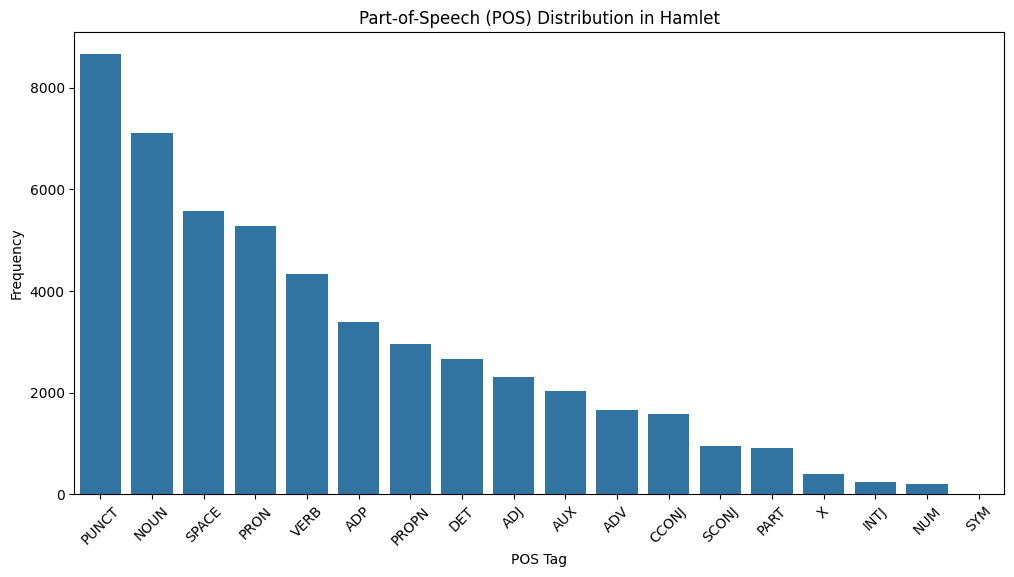

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count POS tags
pos_counts = df['pos_tag'].value_counts()

# Plot POS distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=pos_counts.index, y=pos_counts.values)
plt.title('Part-of-Speech (POS) Distribution in Hamlet')
plt.xlabel('POS Tag')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()
